[View in Colaboratory](https://colab.research.google.com/github/AmoDinho/Data-Science-Essentials/blob/master/conditoned_scatterplots_histograms.ipynb)

In [0]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


In [0]:
frame = pd.read_csv("https://storage.googleapis.com/machinelearning_datasets/frame.csv")

In [11]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
Unnamed: 0         2000 non-null int64
Year               2000 non-null int64
Month              2000 non-null int64
DayofMonth         2000 non-null int64
DayOfWeek          2000 non-null int64
Carrier            2000 non-null object
OriginAirportID    2000 non-null int64
DestAirportID      2000 non-null int64
CRSDepTime         2000 non-null int64
DepDelay           1998 non-null float64
DepDel15           1998 non-null float64
CRSArrTime         2000 non-null int64
ArrDelay           1998 non-null float64
ArrDel15           2000 non-null int64
Cancelled          2000 non-null int64
airport_id         2000 non-null int64
city               2000 non-null object
state              2000 non-null object
name               2000 non-null object
dtypes: float64(3), int64(12), object(4)
memory usage: 297.0+ KB


'ArrDel15'

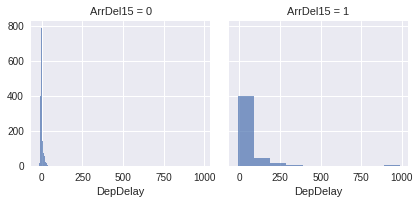

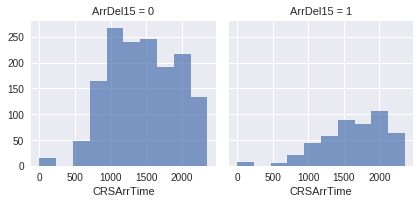

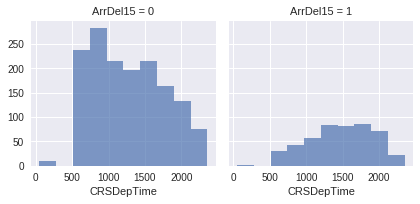

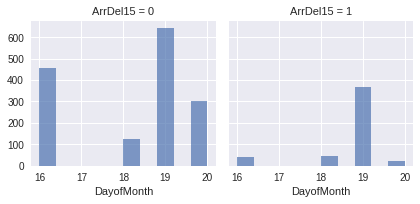

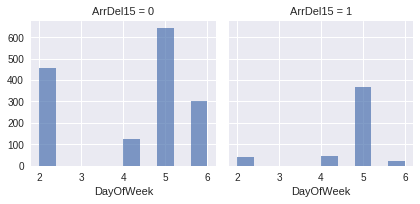

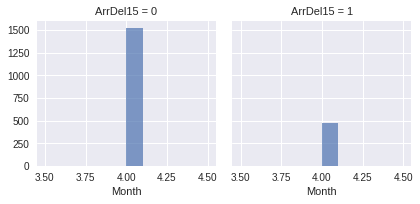

In [4]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid = sns.FacetGrid(df, col=grid_col)
        grid.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["DepDelay",
              "CRSArrTime",
              "CRSDepTime",
              "DayofMonth",
              "DayOfWeek",
              "Month"]

cond_hists(frame, plot_cols2, 'ArrDel15')

['DepDelay', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DayOfWeek', 'Month']

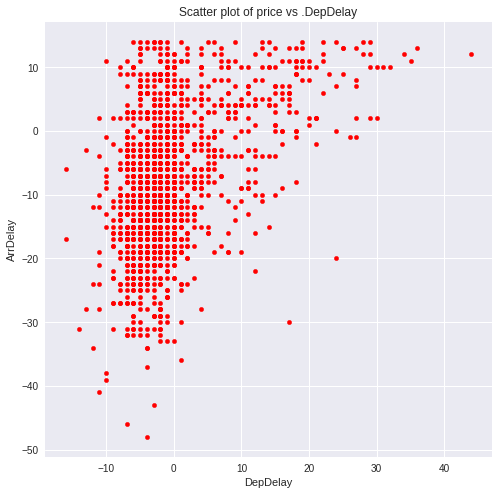

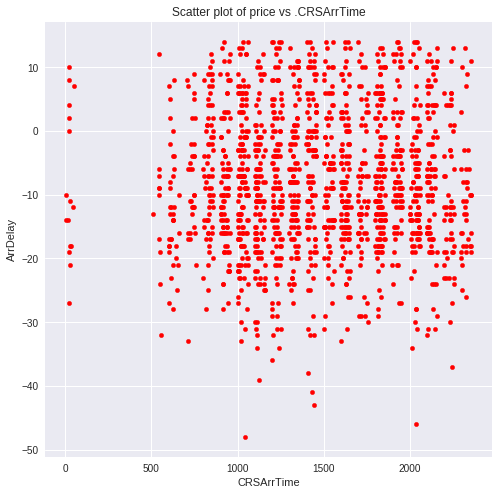

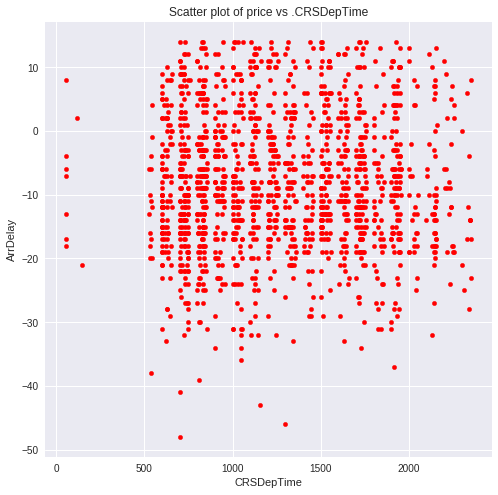

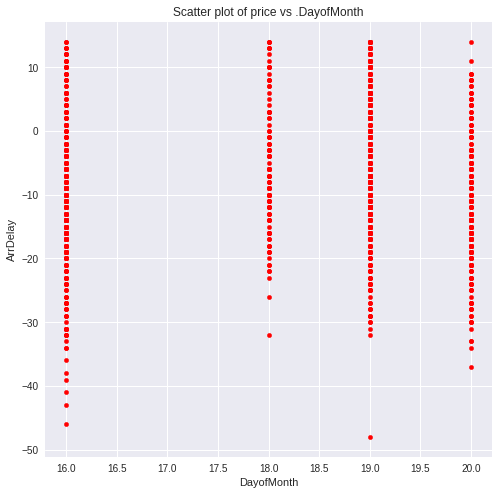

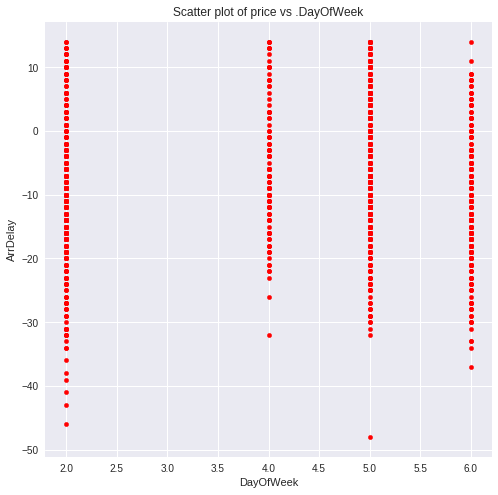

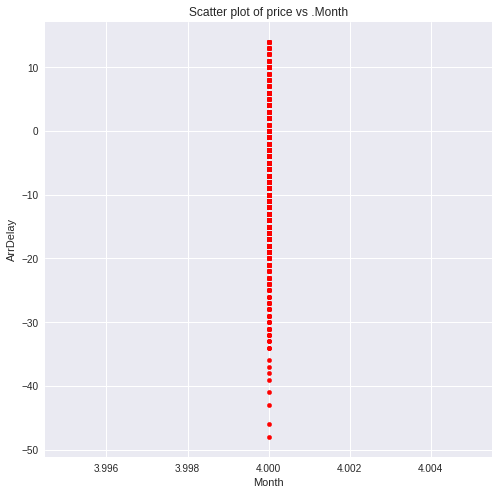

In [24]:
#Conditioned Scatter plots
def auto_scatter(df,plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca()
        temp1 = df.ix[df['ArrDel15'] == 0]
        temp2 = df.ix[df['ArrDel15'] == 1]
        if temp1.shape[0] == 0:
           temp1.plot(kind = 'scatter', x =col,y = 'ArrDelay',
                       ax=ax, color ='DarkBlue')
        if temp2.shape[0]  > 0:
           temp1.plot(kind = 'scatter', x =col,y = 'ArrDelay',
                       ax=ax, color ='Red')
        ax.set_title('Scatter plot of price vs .' + col)
    return plot_cols
  
plot_cols3 = ["DepDelay",
              "CRSArrTime",
              "CRSDepTime",
              "DayofMonth",
              "DayOfWeek",
              "Month"]

auto_scatter(frame, plot_cols3)